# ROSSMANN SALES ANALYSIS

# Introduction

This analysis is based on a <a id='https://www.kaggle.com/c/rossmann-store-sales'>kaggle dataset</a> about the Rossmann sales.
Rossmann is a German drugstore chain with more than 3000 shops in 7 countries. This dataset is only based on the german based shops, 1115 in total.

This project will be divided in 2 main parts: 

- Understand the current situation, by cleaning the data and exploring it (EDA).

- Forecast sales that are depending on factors such as promotions, competition, school and state holidays, seasonality, and locality.

For the first step, I am using Python programming language and libraries such as Pandas, Matplotlib, Seaborn and Plotly for data analysis and visualisation.

The second step will be done using scikit (Python library for Machine learning), the content will be publish once completed.



# Data Import and Cleaning

**1 - Install the needed libaries**

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import calendar
from scipy import stats
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools
import plotly.graph_objs as go 
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


I first of all import all the libaries needed to achieve this project.

**2 - Data import**

The project comes with 2 csv files holding information about the 1115 shops sales activity that we are about to analyse. The first csv file is called "train" contains historical data including Salesn and the second one called 'stores' contains supplemental information about the stores. 
Let's read the files and print their top entries.

In [2]:
store = pd.read_csv('store.csv')
train = pd.read_csv('train.csv')


/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning:

Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.



**3 - Discover the Data**

Those are the first 5 rows of the store dataframe:

In [3]:
store.head()


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


Those are the first 5 rows of the train dataframe:

In [4]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Most of the fields are self-explanatory, but some are not, I invite you to check the  <a id='https://www.kaggle.com/c/rossmann-store-sales'>kaggle project page </a> explaining the data fields. 

Let's get more information about it:



In [5]:
store.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             10

From the above we can confirm that there is 1115 unique stores, but also that both table have a commoin column 'store' which is usful for a potential table joining. Also we discover how large is the tain dataset, stocking more than 1 million daily sales per shops. The next step is to find out if the dataframe needs to be cleaned.

**4 - Data cleaning**

After checkin, I can confirm that the datasets don't have duplicate row, which has been checking with store.drop_duplicates() and train.drop_duplicates() however we can see from the table printing that some values were missing. Let's find out how many!

In [6]:
store.isnull().sum()


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [7]:
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

As you can see the store dataframe is missing some values, but the train one not. If we compare 544 or 354 to the total numbers of rows in the store dataset (more than 1 millions) we can easily take the decision to drop them. But check how related they are using <a id='https://github.com/ResidentMario/missingno'>Missingno </a> on the store dataset. 

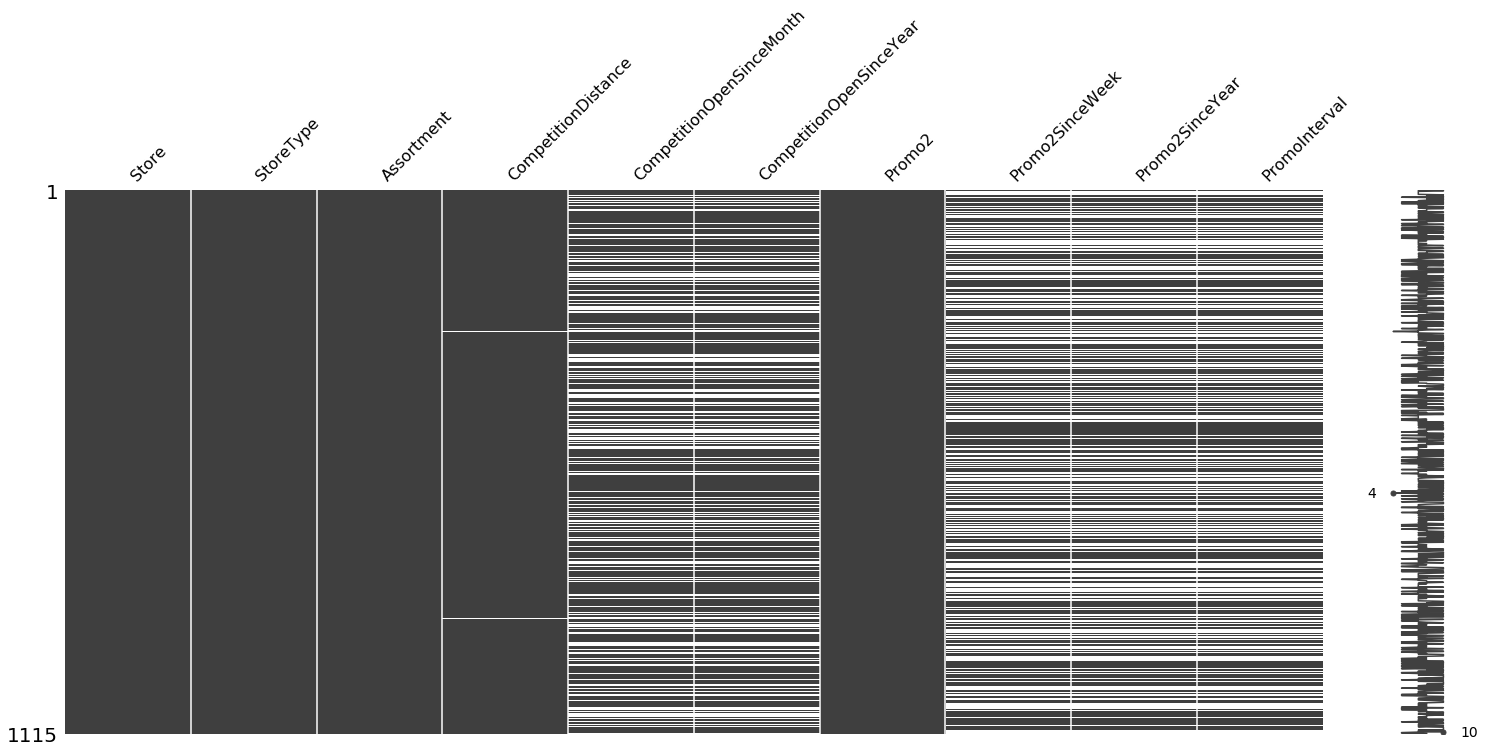

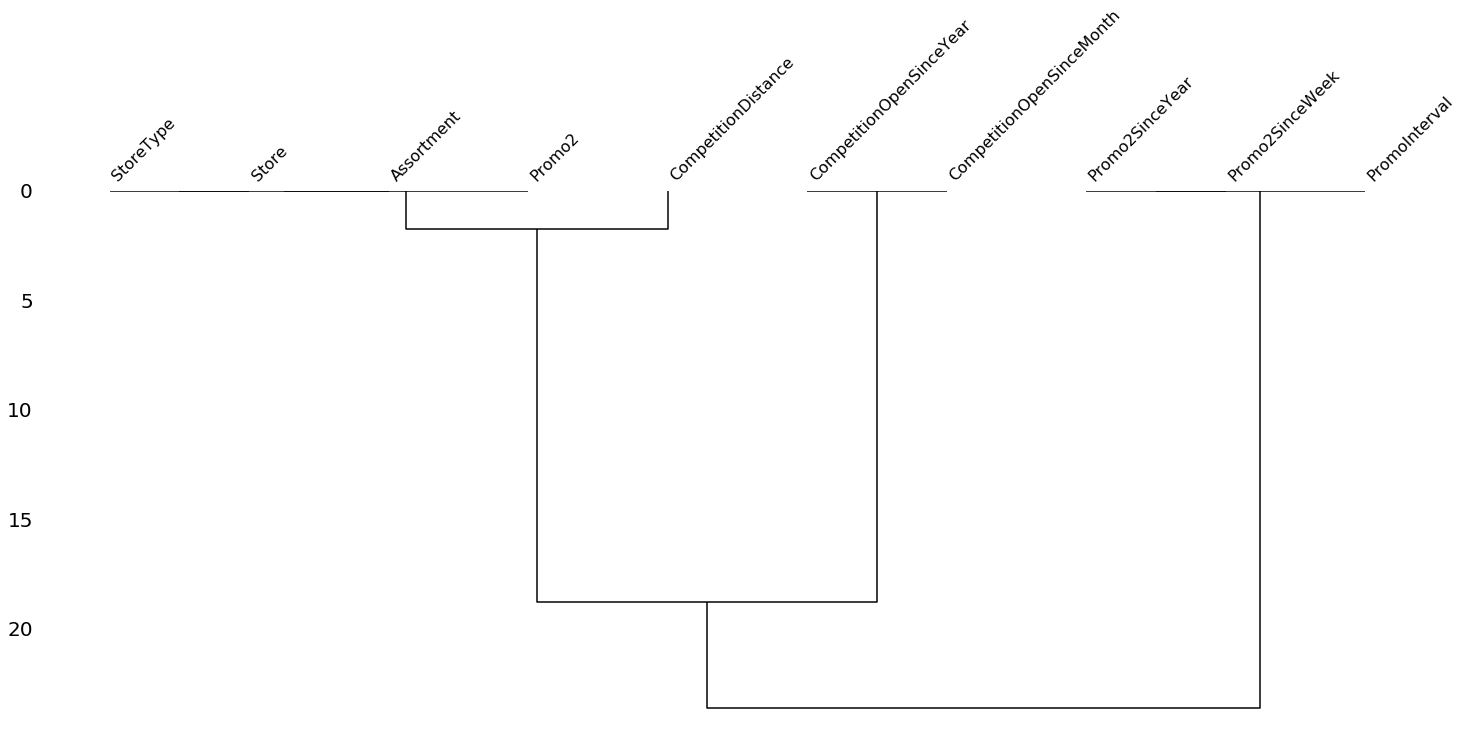

In [8]:
import missingno as msno
msno.matrix(store)
msno.dendrogram(store)

From this matrix we can confirm that the missing columns are linked together having the same number of missing values therefore removing all of them won't impact the rest of the dataframe.

In [9]:
#clean up missing values for the store dataframe

#use the interpolate method of floats columns 
#store[store.columns[3:6]] = store[store.columns[3:6]].interpolate()
#store[store.columns[7:9]] = store[store.columns[7:9]].interpolate()

#ue the mean function for the remaining empty rows 

#store.fillna(store.mean())

store = store.dropna(axis=0)


Now that we dropped the rows we can check again to see if there is still missing values.

In [10]:

store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

**4 - Data type update**

From the data discovery subsection we would discover the preassigned data types for each datafram rows, with the command : store.info() and train.info(). Let's now be more specific about the each column's type.

In [11]:
#creating for loops to change the data type of the columns from both dataframes.For example, columns such as 'Open' or 'Promo"
#can be indentified as booleans holding value of 0 when it's False and 1 when it's True, 
#therefore the boolean type if more appropriate.

for col in ['StoreType','Assortment','Promo2']:
    store[col]= store[col].astype('category')
    
for col in ['Promo2']:
    store[col]= store[col].astype('bool')
    
for col in ['Open', 'Promo', 'StateHoliday','SchoolHoliday']:
    train[col]= train[col].astype('bool')
    
for col in ['DayOfWeek']:
    train[col]= train[col].astype('category')
    
train['Date'] = pd.to_datetime(train['Date'])

We can now read the info for each dataframe to the new data types of they columns. 

In [12]:
train.info()
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null category
Date             1017209 non-null datetime64[ns]
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null bool
Promo            1017209 non-null bool
StateHoliday     1017209 non-null bool
SchoolHoliday    1017209 non-null bool
dtypes: bool(4), category(1), datetime64[ns](1), int64(3)
memory usage: 35.9 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 1 to 1110
Data columns (total 10 columns):
Store                        365 non-null int64
StoreType                    365 non-null category
Assortment                   365 non-null category
CompetitionDistance          365 non-null float64
CompetitionOpenSinceMonth    365 non-null float64
CompetitionOpenSinceYear     365 non-null float64
Promo2                       365 n

As you can see, the changes have been applied, taking the 'Open' Column as example again, it is now marked as 'bool' for booleans. 




**5 - Expand the Dataframes**

Now that we have cleaned the dataframes and updated the value types. We can think of adding new columns that will simply our analysis. In this particular case I would like to create and day of the week column stating in letters the day of the week eg:'Tuesday', but also to extract the Month and the day of the month, from the Data column of the train dataframe.

In [13]:
train['Month']=train['Date'].dt.month #extract the month  (ex: 12)
train['Year']=train['Date'].dt.year #extract the year (ex: 2011)
train['Day']=train['Date'].dt.day #extract the day (ex: 1)
train['Dayoftheweek']=train['Date'].dt.weekday_name #(ex: Monday)


#using mapping and lambda expression to replace to create a month column with the mont abreviations

look_up = {1: 'Jan', 2: 'Feb', 3: 'Mrch', 4: 'April', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct',11:'Nov',12: 'Dec'}

train['Monthofyear']  = train['Month'].apply(lambda x: look_up[x])

Now that we have create the colums we can have another look at the train dataframe sample.

In [14]:
train.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year,Day,Dayoftheweek,Monthofyear
874669,180,3,2013-05-08,7809,958,True,False,True,True,5,2013,8,Wednesday,May


It worked, 6 new columns have been created! Month, Year, Day, Dayoftheweek, Monthofyear.

**6 - Create a new dataframe**

I find both dataframe interesting, but joining them will give us more insights. I will then join them on their common column 'Store'. To start we need work on the train datagrame grouping each row by Store number in order to be able to merge it iwth the Store dataframe holding only unique value in this specific column.

In [15]:
#Sum the train dataframe by store number summing up the others columns 
trainsumbystore = train.groupby('Store').sum().reset_index()
 
#Merge the two datasets 

mergedtable = pd.merge(trainsumbystore, store, on='Store')

Now we have 3 main datasets, train, store and the mergedtable.

# Data Analysis

I am now going to answer few questions that I find interesting, in order to understand Rossmann current situation.

**1 - How are the sales envolving over time? **

From the graph below we can see that we don't have any record for the seoond half of the year 2015.
If we focus on the first 6 months for each year, a natural growth year over year is noted expect for the month of March where the Sales of 2013 were better than the ones from 2014 which equals to a drop of about 4%.

The biggest growth during these 6 months was in june, comparing 2014 and 2015 we note an increase of about 9%. Also the less performing month is Feburary. I assume that the number of bank holidays and the short month could impact the sales. 

Regarding the second half of the year, comparing 2013 and 2014, the shops were peforming much worst in 2014 thans during the previous year. Let's now calculate the negative growth pourcentage is about 13,22%.


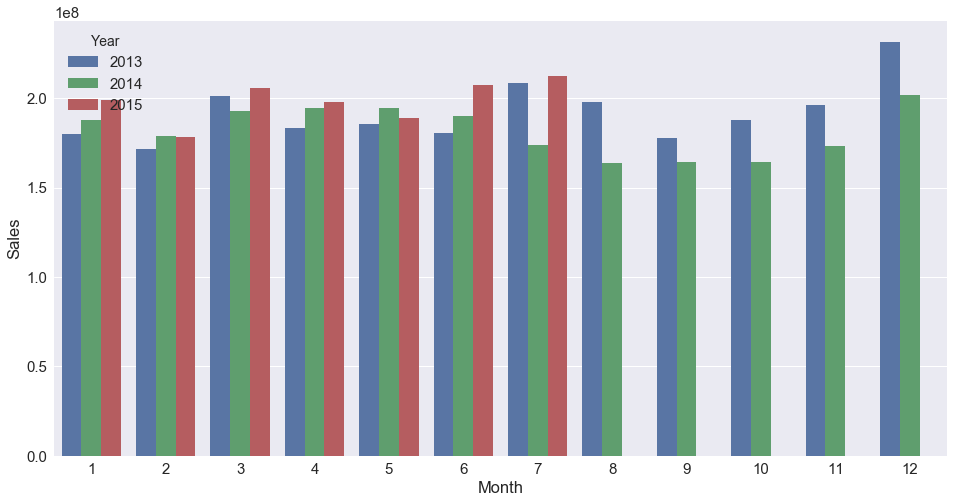

In [97]:
salesintime = train[['Year','Month','Sales']].groupby(['Year','Month']).sum().reset_index()

#salesintime.iplot(kind='box', x='Month', y='Sales', 
                  #categories='Year', title= 'Sales evolution by month and year')


plt.figure(figsize = (16,8))
sns.barplot(x='Month', y='Sales', data = salesintime, hue='Year')
#g.set(xticklabels=['Jan','Feb','Mrch','April','May',
           #'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


In [21]:
#Growth calculation regarding the second half of the year 2014 vs 2013
cc = train [['Year','Month','Sales']].groupby(['Year','Month']).sum().reset_index()

cc2013 = cc[(cc['Month']>=7) & (cc['Year']==2013)]
cc2013 = cc2013['Sales'].sum()

cc2013
cc2014 = cc[(cc['Month']>=7) & (cc['Year']==2014)]
cc2014 = cc2014['Sales'].sum()

growth = ((cc2014-cc2013)/cc2013)*100
growth

-13.216506246823851

**2 -  What are the top 20 best selling stores? **

This is a simple barplot showing the top 20 best performaing store in terms of sales. The shop number 262 is generated the highest revenue, 19.52 millions.

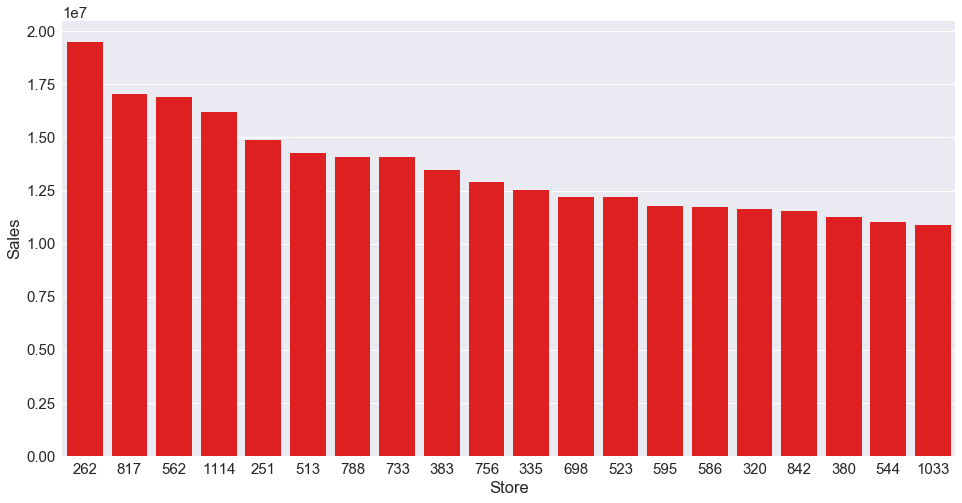

In [128]:
#Create a dataframe with the store id and the adequate sales
topshop =train [['Store','Sales']]

#Group by store
topshop = topshop.groupby('Store').sum()

#Sort the dataframe by order descending
topshop =topshop.sort_values('Sales', ascending=False)

#Grab the top 20 shops
topshop = topshop.head(20).reset_index()

#plot it
plt.figure(figsize = (16,8))

sns.barplot(x='Store', y='Sales', data=topshop, order=topshop['Store'], color = "red")


#topshop.iplot(kind='bar', xTitle='Stores', yTitle='Sales', y='Sales', text = 'Store' , title= 'Top 20 best selling stores')

**3 -  Is the revenue varying depending on the store type? **

In addition to the store listing, there is the store type to concider. Indeed, it's interesting here to see if a store type is performing better than the other.

The store type 'a' is the best performing, generating  962 millions which is about 2 times what's the store type 'd' is generating and about 4 times what the store type 'c' is generating.

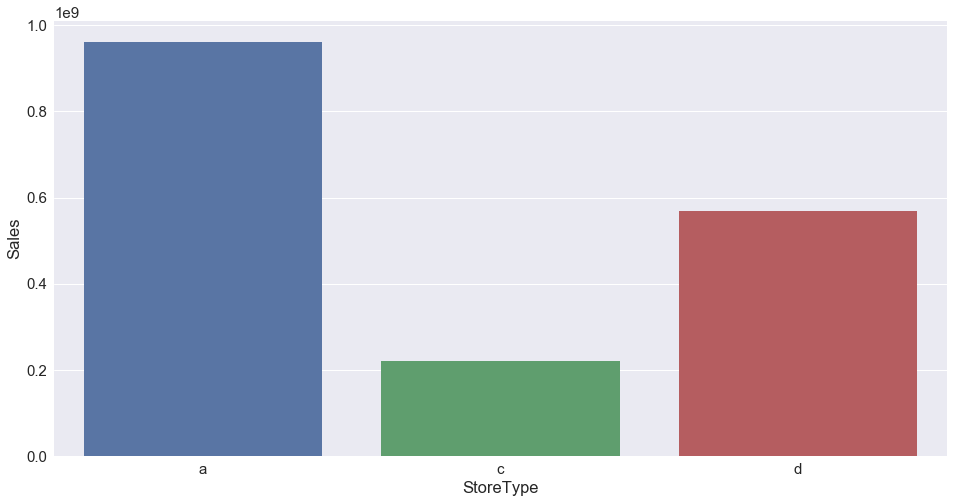

In [113]:
salesstoretype= mergedtable[['StoreType', 'Sales']]
salesstoretype= salesstoretype.groupby('StoreType').sum().sort_values(by='Sales',ascending=False)
salesstoretype= salesstoretype.reset_index()

plt.figure(figsize = (16,8))
sns.barplot(x='StoreType', y='Sales', data=salesstoretype)

#trace1 = go.Bar(
   # x=salesstoretype[('StoreType')],
    #y=salesstoretype[('Sales')],
    #name='Name of Trace 1'
#)

#data = [trace1]

#layout = go.Layout(
    #title='Revenue generated by Shop Type',
    #xaxis=dict(
        #title='Store Type',
        #titlefont=dict(
            #family='Courier New, monospace',
            #size=18,
           # color='#7f7f7f'
        #)
    #),
    #yaxis=dict(
       # title='Sales',
        #autorange = True,
        #titlefont=dict(
           # family='Courier New, monospace',
           # size=18,
            #color='#7f7f7f'
 #       )
 #   )
#)
#fig = go.Figure(data=data, layout=layout)

#fig.iplot()

**4 -  What are the total sales and AOV per day of the week and month? **

Which day of the week or month generate the highest revenue, and ABS (Average Basket Size). I created to seperate graphs side by side to ease the comparison.

Regarding the Sales Graphs on the left, the begining of the week are when the stores globally are henerating more money,on Mondays and Tuesdays, the third place is for Fridays. Which is also applicable for the ABS, expect that it's expectionnal higher on Wesdnesday than Friday, repectively at 9.08 and 9.04.


If we have a look at the right graph, repsenting the sales and ABS my month, we can note that March and July are the best performing months in terms of sales. But, the ABS is higher in December with 9.71 euros spent in avarage and 9.24 euros in July.

In [42]:
#Create two new dataframe

basketweek = train[['Dayoftheweek','Sales','Customers']]
basketweek = basketweek.groupby('Dayoftheweek').sum()
basketweek = basketweek.sort_values(by='Sales',ascending = False)
basketweek = basketweek.reset_index()
basketweek['Basket'] = basketweek['Sales'] / basketweek['Customers'] 

basketmonth = train[['Monthofyear','Sales','Customers']]
basketmonth = basketmonth.groupby('Monthofyear').sum()
basketmonth = basketmonth.sort_values(by='Sales',ascending = False)
basketmonth = basketmonth.reset_index()
basketmonth['Basket'] = basketmonth['Sales'] / basketmonth['Customers'] 


#Create the format of our plot grid

fig = tools.make_subplots(rows=1,
                          cols=2,
                          print_grid=True,
                          horizontal_spacing=0.18,
                         )

#Define the 4 traces 

trace1 = dict(type='bar',
              x= basketweek[('Dayoftheweek')], 
              y= basketweek[('Sales')],
              name='Sales',            
              marker=dict(color= 'rgba(220,49,72, 0.8)', 
                          line= dict(width= 1)),
              showlegend=False
             )
 

trace2 = dict(type='scatter',
              x= basketweek[('Dayoftheweek')], 
              y= basketweek[('Basket')], 
              marker= dict(line= dict(width= 1), 
                           size= 8), 
              line=dict(color= '#B0122C',
                        width= 1.5),
              name= 'ABS',
              showlegend=False
             )


trace3=dict(type='bar',
            x=basketmonth[('Monthofyear')],
            y=basketmonth[('Sales')],
            name='Sales',
            marker=dict(color= 'rgba(220,49,72, 0.8)', line= dict(width= 1)),
            showlegend=False 
          )
trace4=dict(type='scatter',
            x= basketmonth[('Monthofyear')],
            y=basketmonth[('Basket')],
            marker= dict(line= dict(width= 1), 
                         size= 8), 
            line=dict(color= '#B0122C', width= 1.5),
            name= 'ABS',
            showlegend=False
           )

# Append the first two traces to subplot (1,1), and the last two, to subplot (1,2):

fig.append_trace(trace1, 1, 1)# trace1 is in position 0 of the list fig['data]
fig.append_trace(trace2, 1, 1)#                       1 
fig.append_trace(trace3, 1, 2)#                       2
fig.append_trace(trace4, 1, 2)#                       3

# Now we update yaxis for both trace2 and trace4 - meaning positon 1 and 3
fig['data'][1].update(yaxis='y3')
fig['data'][3].update(yaxis='y4')

# Update layout


fig['layout'].update(autosize= False, 
              width= 800, 
              height= 500, 
              showlegend=False,
              hovermode='x')


fig['layout']['xaxis1'].update(tickangle= -45, #'x1'
                         autorange=True,
                         tickfont=dict(size= 10), 
                         title= 'Days of the Week', 
                         type= 'category',
                         )
fig['layout']['yaxis1'].update( #left yaxis'y1
                         showgrid=True, 
                         title= 'Sales',
                         )

#Insert a new key, yaxis3, and the associated value:
fig['layout']['yaxis3']=dict(
                          overlaying= 'y1', 
                          anchor= 'x1', 
                          side= 'right', 
                          showgrid= False, 
                          title= 'AOV'
                         )

fig['layout']['xaxis2'].update(autorange=True,
                         tickfont=dict(size= 10), 
                         title= 'Months', 
                         type= 'Months',
                         )
fig['layout']['yaxis2'].update(
                         showgrid=True, 
                         title= 'Sales',
                         )
#Insert a new key, yaxis4, and the associated value:
fig['layout']['yaxis4']=dict(
                          overlaying= 'y2', 
                          anchor= 'x2', 
                          side= 'right', 
                          showgrid= False, 
                          title= 'ABS'
                         )

iplot(fig)


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



**5 -  What are the best selling assortment? **

We have seen that there are different types of store, we now going to compare the assortment types.

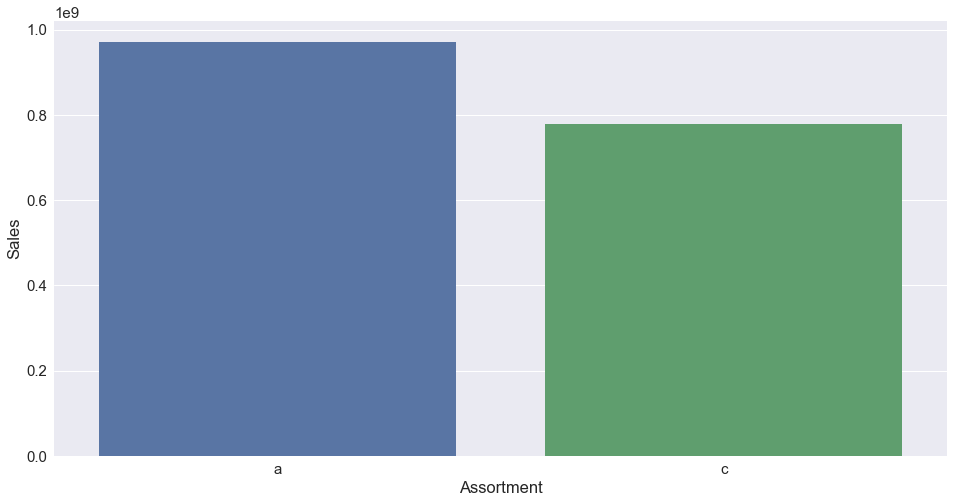

In [114]:
salesassortment= mergedtable[['Assortment', 'Sales']]
salesassortment= salesassortment.groupby('Assortment').sum().sort_values(by='Sales',ascending=False)
salesassortment= salesassortment.reset_index()


#trace1 = go.Bar(
 #   x=salesassortment[('Assortment')],
  #  y=salesassortment[('Sales')],
   # name='Name of Trace 1'
#)

#data = [trace1]

#layout = go.Layout(
 #   title='Revenue generated by Assortment',
  #  xaxis=dict(
   #     title='Assortment',
    #    titlefont=dict(
     #       family='Courier New, monospace',
      #      size=18,
       #     color='#7f7f7f'
       # )
   # ),
   # yaxis=dict(
    #    title='Sales',
    #    autorange = True,
      #  titlefont=dict(
       #     family='Courier New, monospace',
        #    size=18,
        #    color='#7f7f7f'
 #       )
 #   )
#)
#fig = go.Figure(data=data, layout=layout)

#fig.iplot()

plt.figure(figsize = (16,8))
sns.barplot(x='Assortment', y='Sales', data=salesassortment)

**6 - What are the best assortment by shop type **

What if we cross the information, and find out how each assortment are sold in each storetype?  It's interesting to see that the assortment 'a' is better sold in the store type 'A', and that the assortment 'C' is better sold in the store type D. To finish it's the assortments are sold equaly in the store type C.

In [44]:
salesassortment= mergedtable[['StoreType','Assortment', 'Sales']]
salesassortment= salesassortment.groupby(['StoreType','Assortment']).sum().sort_values(by='Sales',ascending=False)
salesassortment= salesassortment.reset_index()

a = salesassortment[salesassortment['StoreType']=='a']
b = salesassortment[salesassortment['StoreType']=='b']
c = salesassortment[salesassortment['StoreType']=='c']
d = salesassortment[salesassortment['StoreType']=='d']


trace1 = go.Bar(
    x=a['Assortment'],
    y=a['Sales'],
    name='Store Type A'
)
trace2 = go.Bar(
    x=b['Assortment'],
    y=b['Sales'],
    name='Store Type B'
)

trace3 = go.Bar(
    x=c['Assortment'],
    y=c['Sales'],
    name='Store Type C'
)

trace4 = go.Bar(
    x=d['Assortment'],
    y=d['Sales'],
    name='Store Type D'
)

data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    title='Revenue generated by Assortment and Store Type',
    barmode='group',
    xaxis=dict(
        title='Assortment',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Sales',
        autorange = True,
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

** 7 - How are the columns correlated? **

Here, I have created this pairplot to have a quick idea or confirmation of the potential correlation between colums in the mergedtable table. There is a positive correlation between the number of customers and sales which was guessable in other words when the number of customer increases the sales are increasing. Regarding the sales and the competition we don't see a clear correlation. It would be however interesting to see if the fact the competitor is close to a rossman shops influences the sales or not.

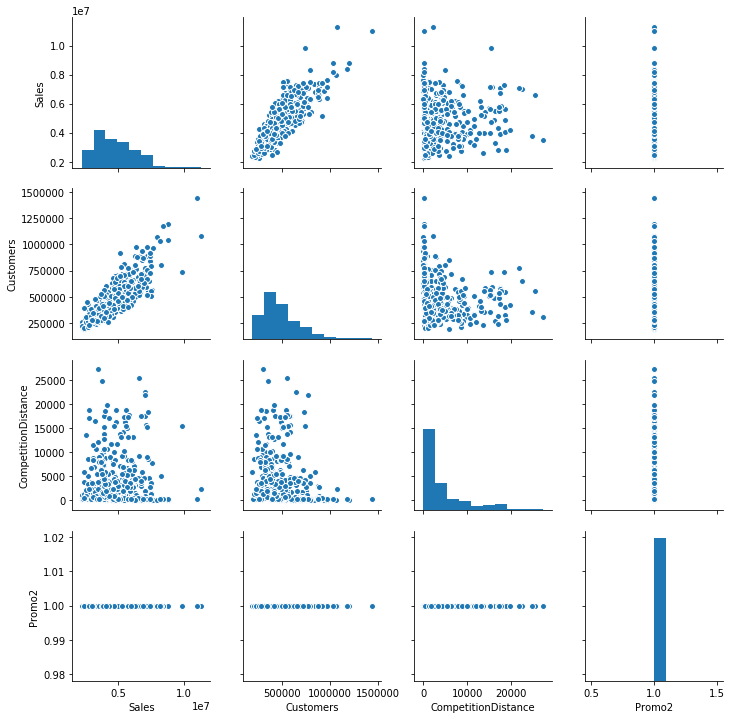

In [45]:
sns.pairplot(mergedtable[['Sales','Customers','StoreType','Assortment','CompetitionDistance', 'Promo2']])

The heatmap below, also show the correlation between columns.

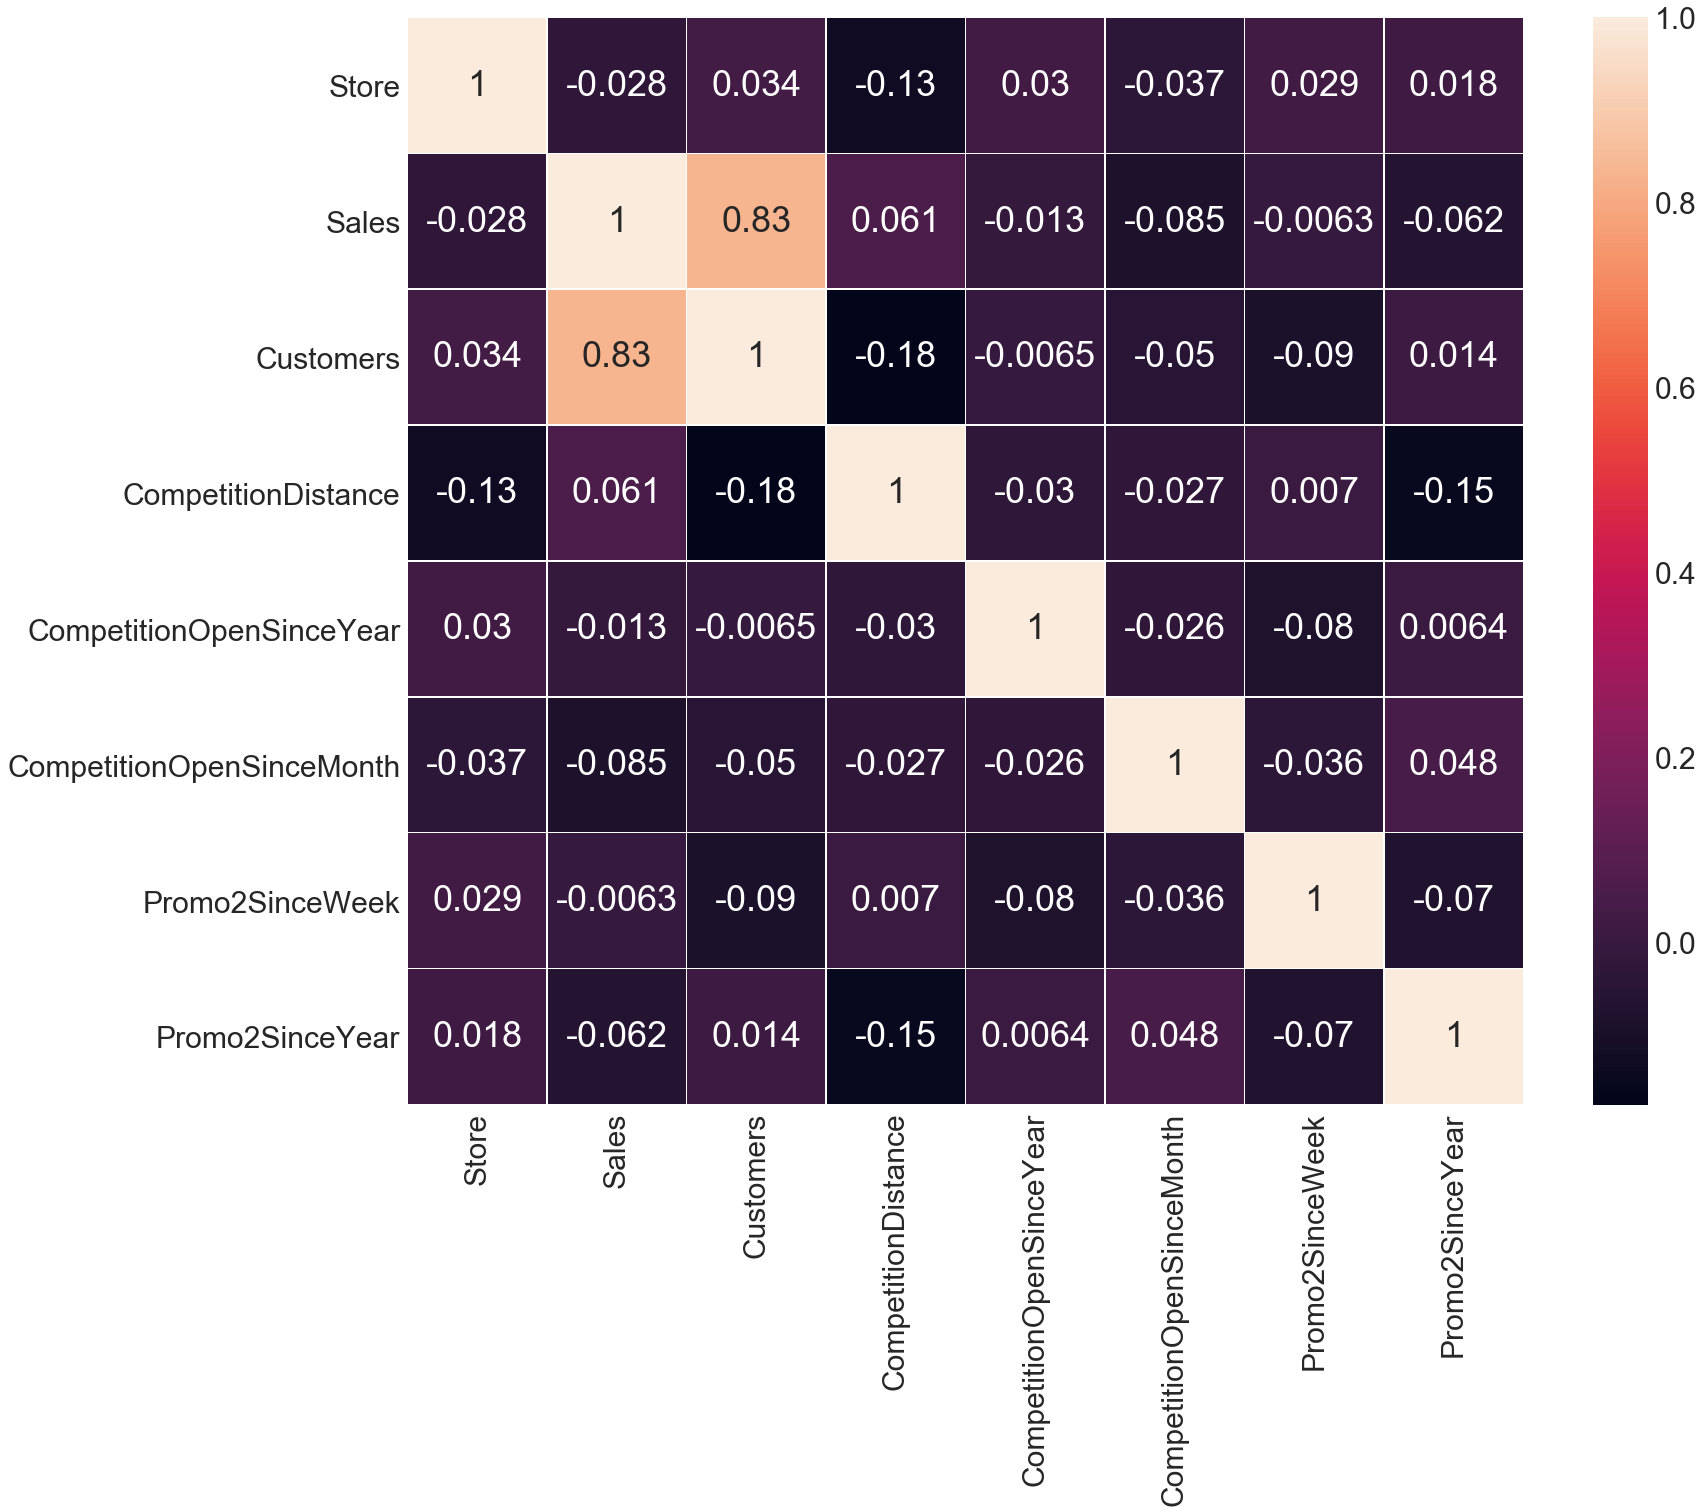

In [145]:
#m = mergedtable.rank()
m = mergedtable[['Store','Sales','Customers','CompetitionDistance','CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'Promo2SinceWeek', 'Promo2SinceYear','PromoInterval']]
m = m.corr()

plt.figure(figsize = (25,20))
sns.set(font_scale=3)

sns.heatmap(m, annot=True, linewidths=.5)

** 8 - How is the competition distance linked to the sales? **

From the heatmap above we can see that the positive correlations are not surprising and most of the columns a poorly correlatated. 

We are now creating a plot, with axes representing different bins and their repective Sales. 

The idea is to see if the distance of the first competitor influences the sales.

We can note  based on the histogram below that the highest sales are made when the first competitor is located between 0 and 250 meters but this trend is not necessarily decreasing with the distance being highter.

As you can see on this graph the closer the competitor is the better it is for Rossmann, however it starts dropping from 250 meters and increasing again from 1000 meters.

I would assume that the competiton is beneficial to Rossman, becaue they are able to attract customers from the compeition with campaigns or a better assortment when both shops are seperateed by a short walking distance.

From 250 to 1000 the walking distance is still acceptable but the  2 shops are more spread, people will then probably choose the one close to their current location (house, office). 

And to finish from 1000 and above the revenue is increasing with the distance, the further the competion is the better for Rossmann, probably because the distances are way bigger, and easier to reach the shop via public transportation or car, therefore people would choose the closet shop.

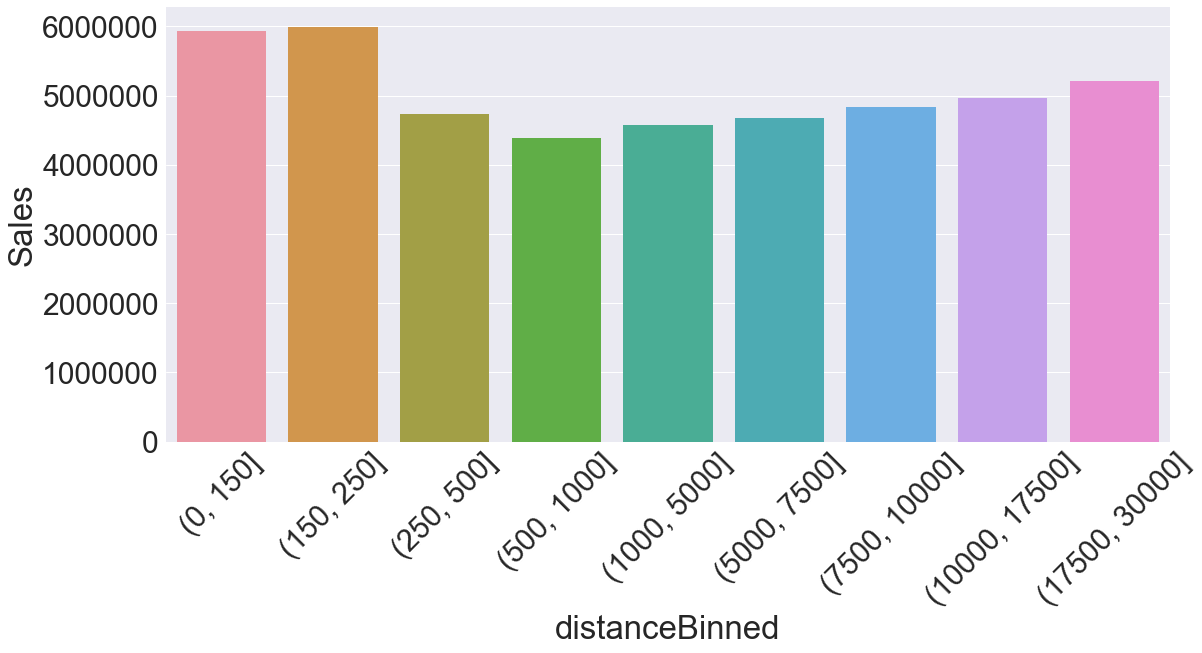

In [150]:
mm = pd.merge(trainsumbystore, store, on='Store')
mm =mm[['CompetitionDistance','Sales']]

bins = [0,150,250,500,1000, 5000, 7500,10000, 17500, 30000]

mm['distanceBinned'] = pd.cut(mm['CompetitionDistance'], bins)

mmbinned = mm[['distanceBinned','Sales']]

mmbinned = mmbinned.groupby('distanceBinned').mean().reset_index()
mmbinned

plt.figure(figsize = (18,8))
plt.xticks(rotation=45)
sns.barplot(x='distanceBinned', y='Sales', data = mmbinned)

** 9 - How are the store types performing during the different promo intervalls? **

The promo intervalls are naming the months the promotion is started. I wanted to know if the sale's performance was different by stortype based on an specific promo interval. 

The idea is to come up witn the best promo interval by storetype!

The box plot below will help us to answer the question. 

The best period for the store type 'a' and 'c' is March, June, September and December, even if the dispersion looks higher in the last interval for the store 'a', the average is better in the that period (middle one). 

Concerning the store type 'd', the first and last intervalls are comparable, but looking at the dataframe to have precised value, the last interval is better with a mean.

In this graph the mean is also represented by the red dot.

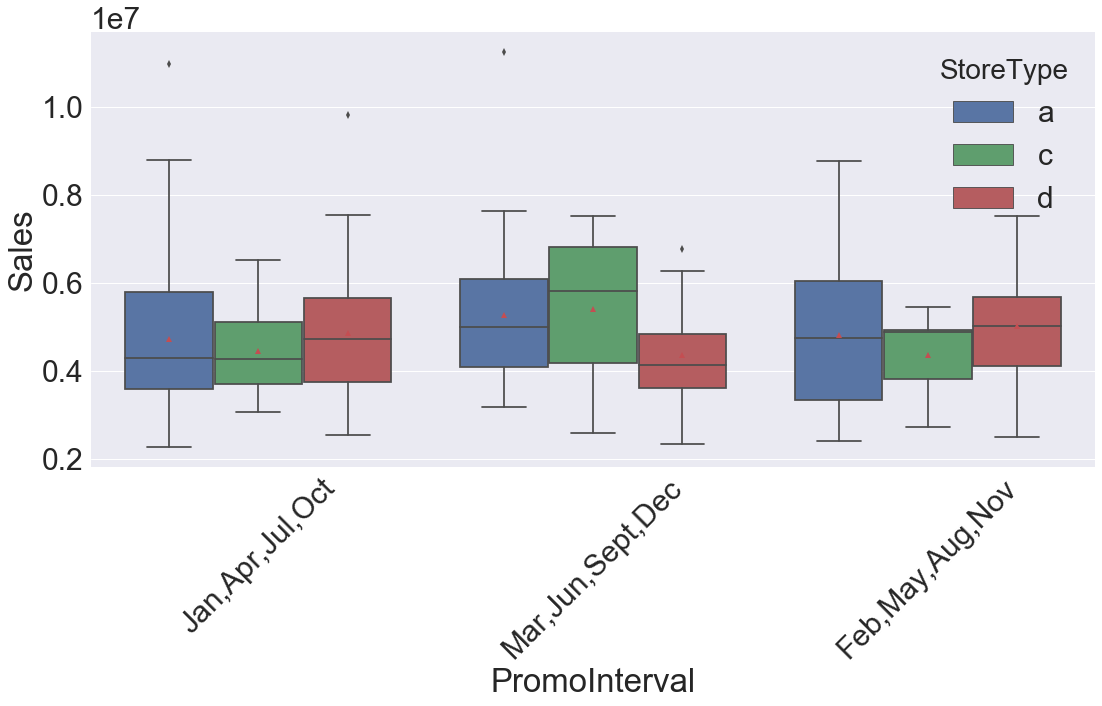

In [176]:
mergedtable.groupby(['PromoInterval','StoreType']).mean().reset_index()


plt.figure(figsize = (18,8))
plt.xticks(rotation=45)
sns.boxplot(x='PromoInterval', y='Sales', data = mergedtable, hue= 'StoreType', showmeans=True)


In [166]:
mergedtable[['PromoInterval','StoreType','Sales']].groupby(['StoreType','PromoInterval']).mean()

Sales
StoreType PromoInterval                 
a         Feb,May,Aug,Nov   4.807156e+06
          Jan,Apr,Jul,Oct   4.721948e+06
          Mar,Jun,Sept,Dec  5.275469e+06
c         Feb,May,Aug,Nov   4.364823e+06
          Jan,Apr,Jul,Oct   4.444419e+06
          Mar,Jun,Sept,Dec  5.399503e+06
d         Feb,May,Aug,Nov   5.025776e+06
          Jan,Apr,Jul,Oct   4.870871e+06
          Mar,Jun,Sept,Dec  4.372964e+06

** 10 - Sales average basket and average revenue non sales on **

In [32]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year,Day,Dayoftheweek,Monthofyear
0,1,5,2015-07-31,5263,555,True,True,True,True,7,2015,31,Friday,Jul
1,2,5,2015-07-31,6064,625,True,True,True,True,7,2015,31,Friday,Jul
2,3,5,2015-07-31,8314,821,True,True,True,True,7,2015,31,Friday,Jul
3,4,5,2015-07-31,13995,1498,True,True,True,True,7,2015,31,Friday,Jul
4,5,5,2015-07-31,4822,559,True,True,True,True,7,2015,31,Friday,Jul


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



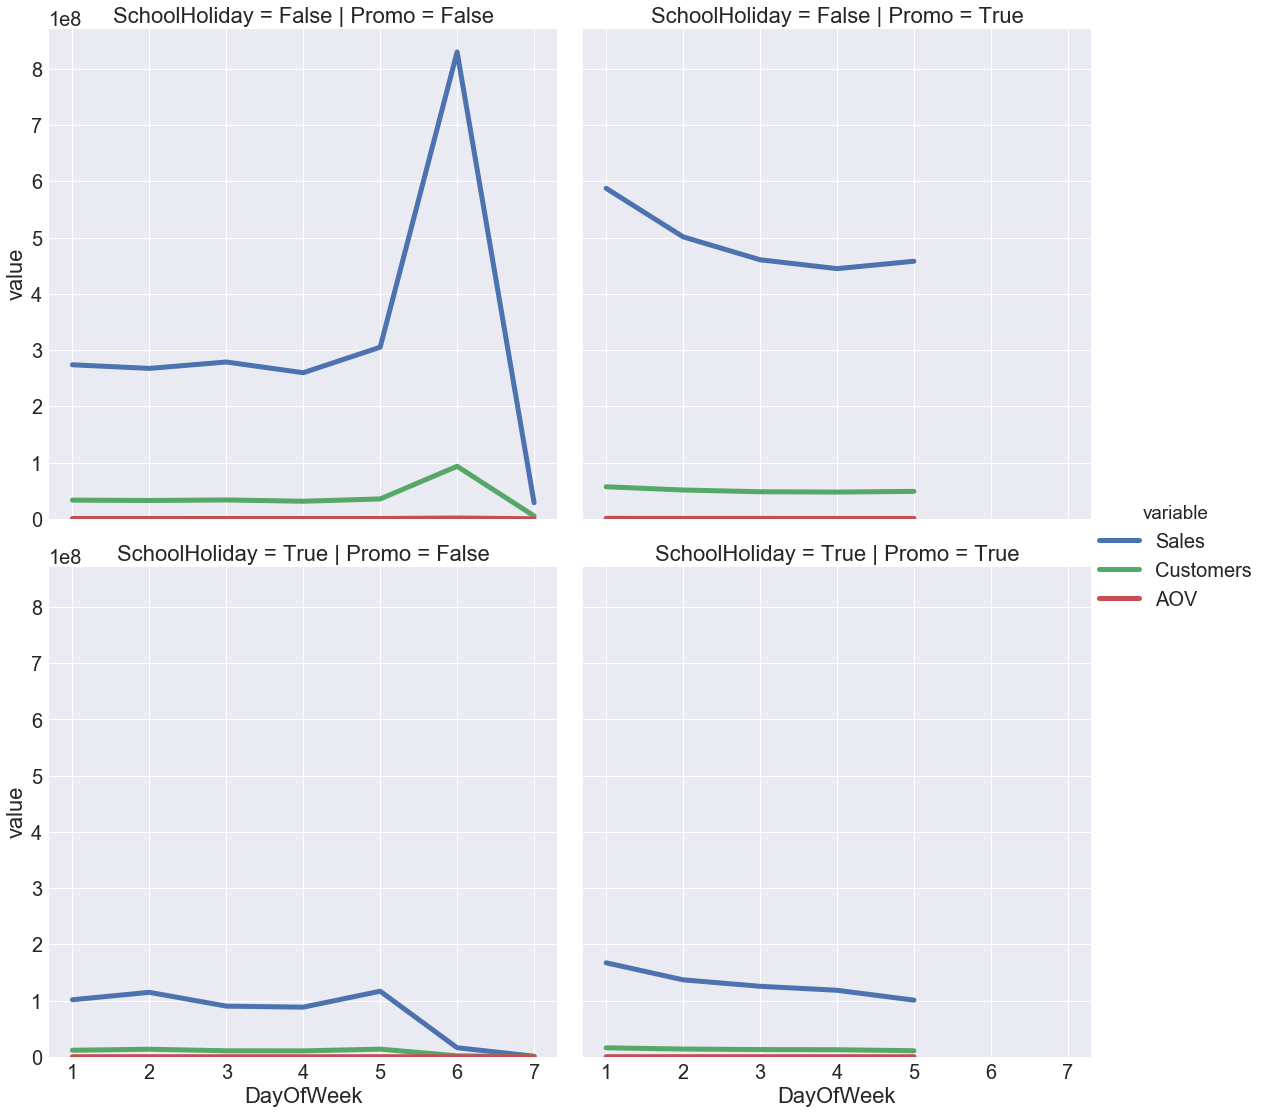

In [33]:
cc = train[['Sales','Customers', 'Promo','SchoolHoliday','DayOfWeek']]

cc['AOV'] = cc['Sales']/cc['Customers']

cc = cc.groupby(['DayOfWeek','Promo','SchoolHoliday']).sum().reset_index()
cc = pd.melt(cc, id_vars=['DayOfWeek','Promo','SchoolHoliday'], value_vars=['Sales', 'Customers','AOV'])
sns.set(font_scale=2)
g = sns.FacetGrid(cc, col='Promo', row='SchoolHoliday', hue='variable', aspect = 1, size = 8)
g.map(plt.plot, 'DayOfWeek','value', linewidth=5 ).add_legend()
g.set(ylim=(0, None))


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



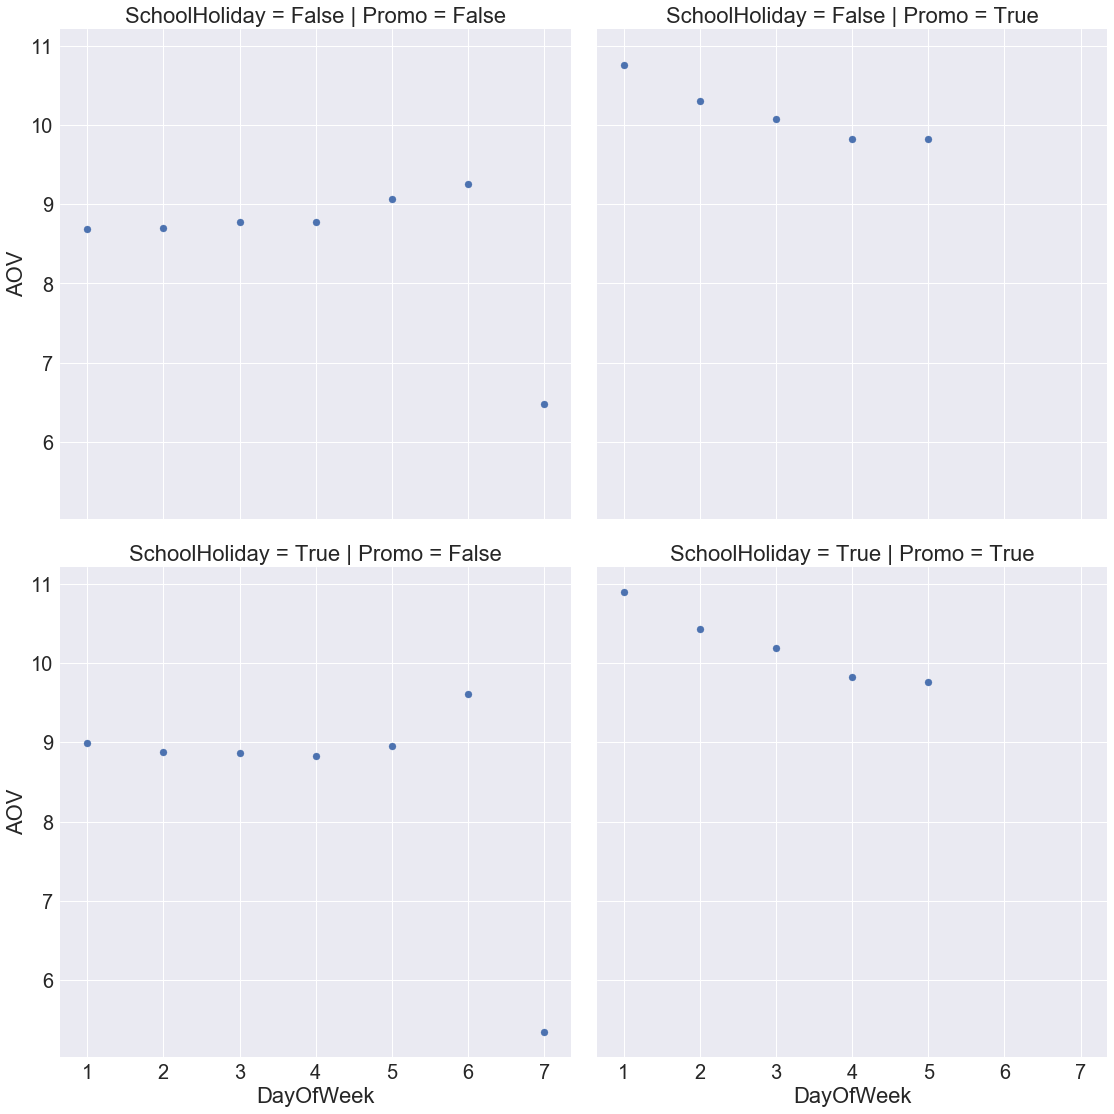

In [34]:
bb = train[['Sales','Customers', 'Promo','SchoolHoliday','DayOfWeek']]

bb['AOV'] = bb['Sales']/bb['Customers']

bb = bb.groupby(['DayOfWeek','Promo','SchoolHoliday']).mean().reset_index()
bb
sns.set(font_scale=2)
g = sns.FacetGrid(bb, col='Promo', row='SchoolHoliday', aspect = 1, size = 8)
g.map(plt.scatter,'DayOfWeek','AOV')


# Conclusion part 1
